## 별점 데이터 탐색
이것으로 추천이 될되겠다 안되겠다는 사전에 판단을 하기는 어렵다...
그러나 추천 시스템을 만들어 보고 그 결과가 잘 안나오는것 같다라고 판단할때 원인을 추론하기 용이 하기 때문에
이 정도는 알고 가야 서비스 분석에도 도움이 된다.

### 유저당 별점 매긴 수
* mean, median, skew, 분포

### 영화별 별점 받은 수 
* mean, median, skew, 분포
* 영화 개봉기간에 따른 별점수 분포 

### 별점 예측 결과 분석 
* 별점 매긴 수별 정확도 
* 별점을 많이 맞은 수별 정확도 
---  

 
 

* seaborn package install 
* http://stanford.edu/~mwaskom/software/seaborn/
* http://stanford.edu/~mwaskom/software/seaborn/installing.html#installing
* 설치가 안되어 있다면 그래프 부분만 제외하고 실행가능 

In [1]:
# coding: utf-8

import pandas as pd
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib
from __future__ import print_function
%matplotlib inline  

rcParams['font.family'] = 'NanumGothic'
rcParams.update({'font.size': 12})
matplotlib.style.use('ggplot')
sns.set_style("whitegrid")

Movie Lens 데이터 로드 
http://grouplens.org/datasets/movielens/

In [2]:
def movieLensDataLoad(type):
    ## user 영화 별점 data 
    ratings = pd.read_csv("/Users/goodvc/Documents/data-analytics/movie-recommendation/"+type+"/ratings.csv")

    ## movie meta(타이트,장르) data 
    movies = pd.read_csv("/Users/goodvc/Documents/data-analytics/movie-recommendation/"+type+"/movies.csv")

    ## user가 영화에 tag를 기입한 data
    tags = pd.read_csv("/Users/goodvc/Documents/data-analytics/movie-recommendation/"+type+"/tags.csv")
    # tags = pd.read_csv("/Users/goodvc/Documents/data-analytics/movie-recommendation/ml-20m/tags.csv")
    return ( ratings, movies, tags )

#ratings, movies, tags = movieLensDataLoad('ml-20m')
ratings, movies, tags = movieLensDataLoad('ml-latest-small')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,6,2,980730861
1,1,22,3,980731380
2,1,32,2,980731926
3,1,50,5,980732037
4,1,110,4,980730408


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,40,1,animation,1306926135
1,40,1,fantasy,1306926130
2,40,1,Pixar,1306926133
3,40,47,dark,1306930201
4,40,47,disturbing,1306930291


* 별점 데이터 요약통계

In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100023.000000,100023.000000,100023.000000,1.000230e+05
mean,341.760765,8613.123442,3.491362,1.091520e+09
std,193.849755,19736.006106,1.067942,1.633577e+08
min,1.000000,1.000000,0.500000,8.285049e+08
25%,180.000000,783.000000,3.000000,9.606706e+08
50%,343.000000,2081.000000,3.500000,1.097974e+09
75%,511.000000,4367.000000,4.000000,1.205150e+09
max,706.000000,129651.000000,5.000000,1.427755e+09


### 유저당 별점 매긴 수
* mean, median, skew, 분포


In [7]:
user_rating_count = ratings.groupby(['userId'])['rating'].count()

In [8]:
user_rating_count

userId
1         227
2          55
3          95
4          93
5          32
6         168
7         124
8         129
9         128
10        284
11         21
12         26
13        260
14         75
15        184
...
692        77
693       107
694        44
695        89
696        71
697        73
698       130
699        58
700       106
701        59
702        21
703        74
704        63
705        49
706        91
Name: rating, Length: 706, dtype: int64

유저당 별점 매긴수(mean) 141
유저당 별점 매긴수(median) 67
유저당 별점 매긴수(skew) 4.077


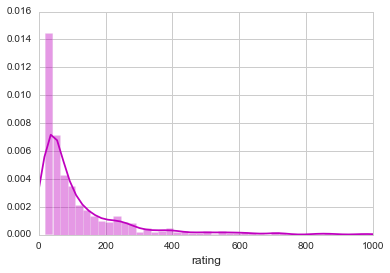

In [9]:
print("유저당 별점 매긴수(mean) %d" % user_rating_count.mean())
print("유저당 별점 매긴수(median) %d" % user_rating_count.median()) 
print("유저당 별점 매긴수(skew) %.3f" % user_rating_count.skew()) 

ax = sns.distplot(user_rating_count, color="m",bins=100)
plt.xlim(0,1000); plt.show();

In [10]:
user_rating_count.sort()
user_rating_count.head(100)

userId
496       20
505       20
461       20
135       20
684       20
573       20
122       20
17        20
16        20
482       20
607       20
653       20
533       20
535       20
81        20
...
179       25
348       25
93        25
400       25
664       25
276       25
601       25
619       25
605       25
211       25
425       26
47        26
110       26
557       26
12        26
Name: rating, Length: 100, dtype: int64

---
### 영화별 별점 받은 수 
* mean, median, skew, 분포
* 영화 개봉기간에 따른 별점수 분포 

영화당 별점 받은수(mean) 11.696
영화당 별점 받은수(median) 3.000
영화당 별점 받은수(skew) 5.238


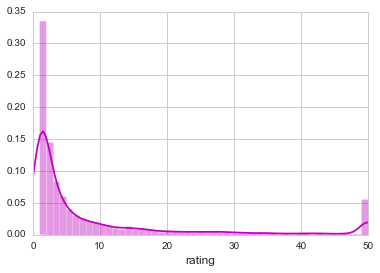

In [11]:
movie_rating_count = ratings.groupby(['movieId'])['rating'].count()
print("영화당 별점 받은수(mean) %.3f" % movie_rating_count.mean()) 
print("영화당 별점 받은수(median) %.3f" % movie_rating_count.median()) 
print("영화당 별점 받은수(skew) %.3f" % movie_rating_count.skew()) 

movie_rating_count[movie_rating_count>50]=50
ax = sns.distplot(movie_rating_count, color="m",bins=50)
plt.xlim(0,50); plt.show()

In [12]:
movie_rating_count.sort()
print("별점 평가수가 5개 미만인 영화 : {0} / {1}".format(
        movie_rating_count[movie_rating_count<5].count()
        ,movie_rating_count.count()))
## 별점 평가시 영화의 별점 평가수별 Error율을 측정해 볼 필요가 있음 

별점 평가수가 5개 미만인 영화 : 5239 / 8552


* 누적합계를 보자

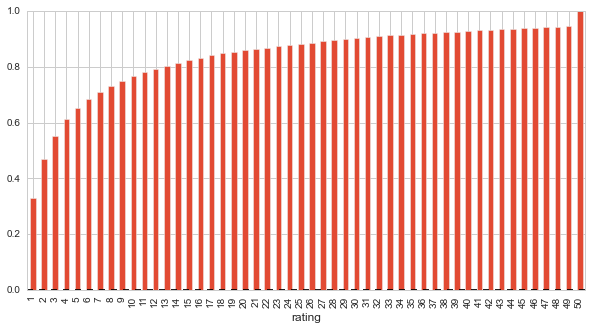

In [13]:
total = movie_rating_count.count()
grouped = movie_rating_count.groupby(movie_rating_count).count() 
cumsum = (grouped).cumsum()
(cumsum/total).plot(kind='bar',figsize=(10,5))
plt.show()

In [14]:
(grouped*grouped.index).cumsum()

rating
1          2808
2          5248
3          7366
4          9386
5         11086
6         12670
7         14210
8         15642
9         17145
10        18615
11        20001
12        21117
13        22157
14        23753
15        24893
16        26237
17        27478
18        28558
19        29356
20        30256
21        31306
22        31966
23        32978
24        33866
25        34941
26        35799
27        36960
28        38080
29        39269
30        40049
31        40917
32        41845
33        42406
34        43222
35        44132
36        44780
37        45298
38        46020
39        46527
40        47287
41        48066
42        48738
43        49684
44        50300
45        50840
46        51484
47        52283
48        52859
49        53594
50        76994
Name: rating, dtype: int64